Competition Id = ML_073

Name - Ayush Agarwal 

College - IIT BHU Varanasi 

Branch - Electronics 2nd year 

Email - ayush.agarwal.ece20@itbhu.ac.in

IIT Pallakad ML Prediction competition 

Solution to Q1 Classification 

In [163]:
##########################################
# IMPORTING THE LIBRARIES

# PANDAS , MATPLOTLIB , NUMPY , SEABORN 

import pandas as pd 
import numpy as np 

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
################################

In [164]:
###############################
# LOADING THE DATA 

# LOADING THE TRAINING DATA USING READ CSV OF PANDAS 
training_data = pd.read_csv("/content/Train_data_classification.csv")
X = training_data.copy()

###################################
# CHECKING THE DATA 

# JUST GATHERING BASIC INFO ABOUT IT 

# This commented option I used before to display the whole data 
# pd.set_option('display.max_columns', None)
# print(X.describe())
# pd.reset_option('all')

# Gathering info like description , length of data , what it looks like , feels like etc 
print(len(X.columns))
print(X.head())
print(X.tail())

# So we have 10 columns ( other than target ofc )
################################

11
   intercolumnar distance   upper margin  ...  modular ratio  class
0                 0.117948     -0.220579  ...       0.541155      A
1                 0.809204     -0.094960  ...       0.244286      I
2                 0.080916      0.014957  ...      -0.028184      A
3                -3.461768     -0.204876  ...      -5.460407      F
4                 0.056229     -0.730905  ...       1.319049      A

[5 rows x 11 columns]
      intercolumnar distance   upper margin  ...  modular ratio  class
8339                -0.277055     -0.251983  ...       0.952766      X
8340                 0.019197     -0.173471  ...      -0.677208      F
8341                -0.128929      0.572391  ...      -0.298954      G
8342                 1.377020     -0.063555  ...      -0.349743      A
8343                -0.573307      0.376111  ...      -0.411272      G

[5 rows x 11 columns]


In [165]:
################################
# MISSING VALUES 
#######################################
# CHECKING FOR MISSING VALUES 

# code to display values when there are too many values and pandas shows ... 
# only needed it while exploring 
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.reset_option('all')

# X1 is the number of null values in each column 
X1 = X.isnull().sum().to_numpy()
# printing it gives a long list , so I used better method ahead
print(X1)

# empty_cols is an array which stores the IDs of the columns which are empty 
empty_cols = np.zeros(10)

# jcol is just a counter variable for loops 
jcol=0

# Using loops to print the number of the column as well as the number of values missing in that column , and only printing it when 
# the number of missing values is not zero 
print("Here are the columns with missing data , along with the number of missing values ")
print()
no_missing_values_cols = 0
for i in range(0,9):
  if(X1[i]!=0):
    print(str(i),str(X1[i]))
    no_missing_values_cols = no_missing_values_cols + 1
    empty_cols[jcol] = i
    jcol = jcol + 1
    
print()

# Printing the information I have collected about the missing values from the data 
print("The number of missing values columns are " + str(no_missing_values_cols))
print()

# empty_cols is an array containing the columns with missing values 
print("Array of column numbers with missing values :")
print(empty_cols)
##############################

# Hence we see that there are NO MISSING VALUES
# Looks like the data is already kinda clean , no need to do EDA on it I feel ( Did other checks too , which strengthened my hypothesis)
##############################

[0 0 0 0 0 0 0 0 0 0 0]
Here are the columns with missing data , along with the number of missing values 


The number of missing values columns are 0

Array of column numbers with missing values :
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


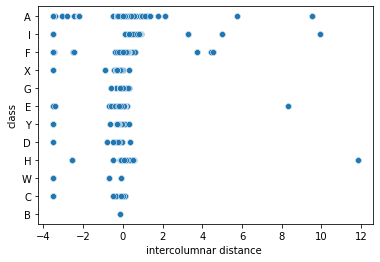

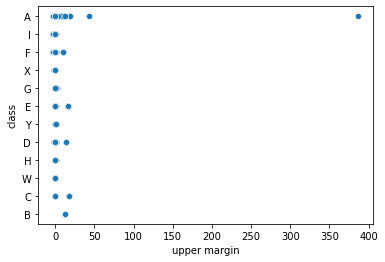

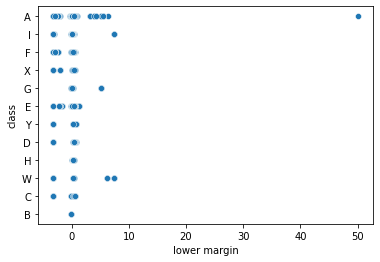

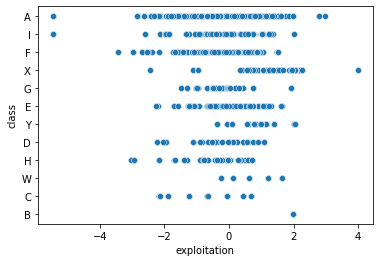

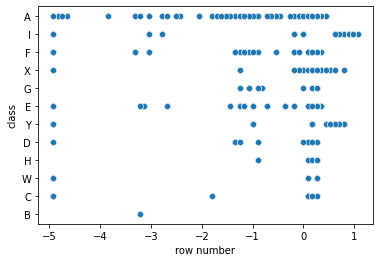

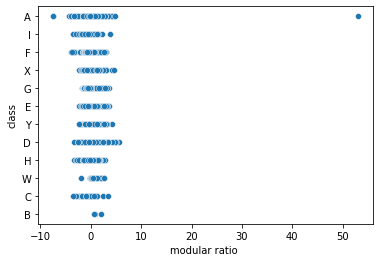

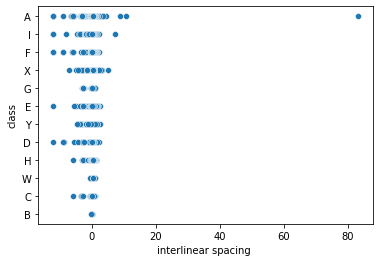

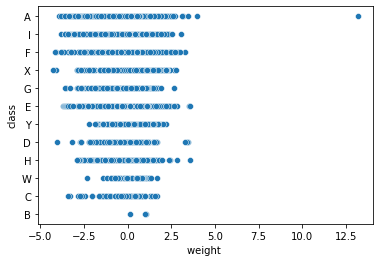

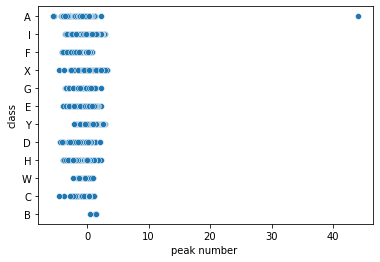

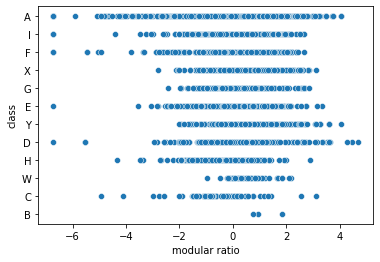

In [166]:
#################################################################
# PLOTTING AND OBSERVING 
#########################################

# plotting the data to see if there is any direct pattern 
for i in range(0,10):
  sns.scatterplot(x=X.iloc[:,i], y=X['class'])
  plt.show()
  
# nope , didn't find any directly human visible or distinctive pattern here
# let the model do it then :)
##############################################

In [167]:
######################################################
# DATA TARGET VALUE ENCODING 
# USING ONE HOT ENCODER 
#######################################
# Since the target value is non numeric (an alphabet), and represents a class , we have to encode it 
# After analysis , I felt ONE HOT ENCODER would be best for this job 

# Importing the required libraries 
import category_encoders as ce

# Making the Encoder
encoder = ce.OneHotEncoder(cols=['class'])

# Using the encoder 
X = encoder.fit_transform(X)

# Just checking 
pd.set_option('display.max_columns', None)
print(X)
pd.reset_option('all')

#############################################


      intercolumnar distance   upper margin  lower margin  exploitation  \
0                    0.117948     -0.220579      0.367214      0.914608   
1                    0.809204     -0.094960      0.118265      0.987502   
2                    0.080916      0.014957      0.064919      0.346104   
3                   -3.461768     -0.204876     -3.210528     -3.441837   
4                    0.056229     -0.730905      0.441898      0.183695   
...                       ...           ...           ...           ...   
8339                -0.277055     -0.251983     -3.203415      1.957926   
8340                 0.019197     -0.173471      0.306755     -0.081535   
8341                -0.128929      0.572391     -0.031104      0.319399   
8342                 1.377020     -0.063555      0.349432      0.405720   
8343                -0.573307      0.376111      0.057807      0.047395   

      row number  modular ratio   interlinear spacing    weight   \
0       0.261718        1.35301

/usr/local/lib/python3.7/dist-packages/pandas/_config/config.py:622: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [168]:
######################################
# SPLITTING THE TARGET VARIABLE FROM THE ORIGINAL DATA 

# Since we had used one hot encoding , hence our target variable is spread across 12 columns 
# Hence we need to remove it properly and assign it to Y 
classes = ['class_1','class_2' , 'class_3' , 'class_4' ,'class_5' , 'class_6' , 'class_7' , 'class_8' , 'class_9' , 'class_10' , 'class_11','class_12']
Y = X[classes]

# Just Checking 
print(Y)

# Now removing the target variable from the dataset 
X.drop(columns = ['class_1','class_2' , 'class_3' , 'class_4' ,'class_5' , 'class_6' , 'class_7' , 'class_8' , 'class_9' , 'class_10' , 'class_11','class_12']
       , inplace=True)

# Just checking 
print(X)
print(type(X))

#######################################

      class_1  class_2  class_3  class_4  ...  class_9  class_10  class_11  class_12
0           1        0        0        0  ...        0         0         0         0
1           0        1        0        0  ...        0         0         0         0
2           1        0        0        0  ...        0         0         0         0
3           0        0        1        0  ...        0         0         0         0
4           1        0        0        0  ...        0         0         0         0
...       ...      ...      ...      ...  ...      ...       ...       ...       ...
8339        0        0        0        1  ...        0         0         0         0
8340        0        0        1        0  ...        0         0         0         0
8341        0        0        0        0  ...        0         0         0         0
8342        1        0        0        0  ...        0         0         0         0
8343        0        0        0        0  ...        0         0 

In [169]:
##################################################

# Splitting the data into testing and training data using sklearn 
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2,
                                                      random_state=0)
##################################################

In [170]:
#################################################################
# MODEL 
######################################################

# Using the RANDOM FOREST REGRESSOR 

# I've experimented with many different models on this data , random forest works the best 

# Importing the libraries 
from sklearn.ensemble import RandomForestRegressor

# Making the model 
rf_model = RandomForestRegressor(random_state = 1)

# Was going for polynomial regression earlier , but it didn't give any significant advantage while increasing the training 
# time by too much , so I commented it 
# poly_reg = PolynomialFeatures(degree=3)
# X_train_2 = poly_reg.fit_transform(X_train)
# X_valid_2 = poly_reg.transform(X_valid)

# Training the model 
rf_model.fit(X_train,y_train)

# Getting the predictions 
y_valid_pred = rf_model.predict(X_valid)

# Just checking 
# It is in the one hot encoded form 
print(np.round_(y_valid_pred))

# Getting the model accuracy , which is 97.24% 
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_valid, np.round_(y_valid_pred))))

# Converting it into pandas dataframe for further processing 
y_valid_pred_2 = pd.DataFrame(np.round_(y_valid_pred), columns = classes)

# Checking 
print(y_valid_pred_2)

# Now attaching the predicted one hot encoded output to the data it was predicted on 
df = pd.concat([X_valid,y_valid_pred_2],axis=1)

# Now looking at the validation data 
print(df.head())

# Now , finally applying the inverse transformation to get the actual classes out the the predictions 
print(encoder.inverse_transform((df)))

#################################################################

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Model accuracy score: 0.9724
      class_1  class_2  class_3  class_4  ...  class_9  class_10  class_11  class_12
0         1.0      0.0      0.0      0.0  ...      0.0       0.0       0.0       0.0
1         1.0      0.0      0.0      0.0  ...      0.0       0.0       0.0       0.0
2         1.0      0.0      0.0      0.0  ...      0.0       0.0       0.0       0.0
3         0.0      0.0      1.0      0.0  ...      0.0       0.0       0.0       0.0
4         1.0      0.0      0.0      0.0  ...      0.0       0.0       0.0       0.0
...       ...      ...      ...      ...  ...      ...       ...       ...       ...
1664      0.0      1.0      0.0      0.0  ...      0.0       0.0       0.0       0.0
1665      1.0      0.0      0.0      0.0  ...      0.0       0.0       0.0       0.0
1666      0.0      0.0      1.0      0.0  ...     

In [171]:
#############################################################
# LOADING THE FINAL TESTING DATA 

final_testing_data = pd.read_csv("/content/Test_data_classification.csv")
X_test_final = final_testing_data.copy()

###################################
# CHECKING THE DATA 

# JUST GATHERING BASIC INFO ABOUT IT 
# This commented option I used before to display the whole data 
# pd.set_option('display.max_columns', None)
# print(X_test_final.describe())
# pd.reset_option('all')

# The final testing data has a blank column called class , which needs to be filled , and hence is empty 
# Hence removing it 
X_test_final.drop(columns = ['class'] , inplace=True)

# Gathering info like description , length of data , what it looks like , feels like etc 
print(len(X_test_final.columns))
print(X_test_final.head())
print(X_test_final.tail())

##########################################################

10
   intercolumnar distance   upper margin  ...  peak number   modular ratio
0                 0.130292     -0.314793  ...      0.375899       0.400605
1                -0.104241     -0.314793  ...     -0.123005      -1.312598
2                 0.019197     -0.040001  ...     -0.777816      -0.209421
3                -0.326430     -0.652394  ...     -2.991700      -3.113659
4                 0.031541     -0.346197  ...     -0.840179      -1.852354

[5 rows x 10 columns]
      intercolumnar distance   upper margin  ...  peak number   modular ratio
2081                -3.498799      0.007106  ...      0.594169      -0.689649
2082                -0.091897     -0.118513  ...     -1.027268       2.580920
2083                -0.091897      0.258344  ...     -0.091823       0.004015
2084                 0.327793      0.501730  ...      0.032902      -0.740413
2085                -0.314087      0.360409  ...     -0.029461      -0.134884

[5 rows x 10 columns]


In [172]:
###################################################################
# FINAL MODEL 
################################################

# Declaring the RANDOM FOREST REGRESSOR MODEL
rf_model_final = RandomForestRegressor(random_state = 1)

# Training it on the whole data 
rf_model_final.fit(X,Y)

# Getting the predictions out of the data on the testing data 
y_test_pred_final = rf_model.predict(X_test_final)

# just checking it 
print(np.round_(y_test_pred_final))

# Converting it to pandas dataframe 
Y_final_predictions = pd.DataFrame(np.round_(y_test_pred_final), columns = classes)
print(Y_final_predictions)

# Attaching it to the final testing data 
df_ultra_final = pd.concat([X_test_final,Y_final_predictions],axis=1)
print(df_ultra_final.head())

# Now converting the one hot encoded predictions to the classes using the inverse transform 
df_ultra_final = encoder.inverse_transform((df_ultra_final))
print(df_ultra_final.head())

# Making the submission file 
output = df_ultra_final
output.to_csv('ML073_Classification.csv', index=False)

############################################################################################

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
      class_1  class_2  class_3  class_4  ...  class_9  class_10  class_11  class_12
0         1.0      0.0      0.0      0.0  ...      0.0       0.0       0.0       0.0
1         0.0      0.0      0.0      0.0  ...      0.0       0.0       1.0       0.0
2         0.0      0.0      1.0      0.0  ...      0.0       0.0       0.0       0.0
3         0.0      0.0      0.0      0.0  ...      0.0       0.0       0.0       0.0
4         1.0      0.0      0.0      0.0  ...      0.0       0.0       0.0       0.0
...       ...      ...      ...      ...  ...      ...       ...       ...       ...
2081      0.0      0.0      0.0      0.0  ...      0.0       0.0       0.0       0.0
2082      1.0      0.0      0.0      0.0  ...      0.0       0.0       0.0       0.0
2083      0.0      0.0      0.0      0.0  ...      0.0       1.0       0.0     

That's it friends , enjoyed solving this classification problem , hope you enjoyed reading it too . Have a nice day ahead .

Thank you :)   

In [173]:
#########################################################################################
# The rest of the file is my rough work showing the different things I tried before making this model . 
# Feel free to scroll throught the rough work 
######################################################################################################

In [174]:
# import category_encoders as ce
# encoder = ce.OrdinalEncoder(cols=['class'])
# X = encoder.fit_transform(X)
# pd.set_option('display.max_columns', None)
# print(X)
# pd.reset_option('all')


In [175]:
# #Importing the libraries 
# from xgboost import XGBRegressor
# from math import sqrt 
# # Making the model and setting the hyperparameters 
# xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.4,random_state=0)
# # poly_reg = PolynomialFeatures(degree=2)
# # X_train_2 = poly_reg.fit_transform(X_train)
# # X_valid_2 = poly_reg.transform(X_valid)
# xgb_model.fit(X_train, y_train ,early_stopping_rounds=20, 
#              eval_set=[(X_valid, y_valid)], 
#              verbose=False)
# #train_pred_2 = xgb_model.predict(X_train,y_train)

# # Getting the predictions 
# y_valid_pred = xgb_model.predict(X_valid)
# print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_valid, np.round_(y_valid_pred))))


84% - 1000 0.4
88% - 2000 0.25

In [176]:
# import numpy as np
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.layers.experimental import preprocessing
# import tensorflow as tf


In [177]:
# model = keras.Sequential([
#     layers.BatchNormalization(input_shape=[10,]),
#     layers.Dense(15, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dense(25, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dense(40, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dense(20 ,activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dense(15, activation='relu'),
#     layers.BatchNormalization(),
    
#     # layers.Dropout(0.3),
#     # layers.Dense(200, activation='relu'), 
#     # layers.BatchNormalization(),
#     # layers.Dropout(0.3),
#     # layers.Dense(500, activation='relu'),
#     # layers.BatchNormalization(),
#     # layers.Dropout(0.3),
#     # layers.Dense(200, activation='relu'),
#     # layers.BatchNormalization(),
#     # layers.Dropout(0.3),
#     # layers.Dense(150, activation='relu'),
#     # layers.BatchNormalization(),
#     #layers.Dropout(0.3),
#     layers.Dense(12, activation=tf.keras.activations.softmax),
# ])

# model.compile(
#     optimizer='adam',
#     loss='categorical_crossentropy',
#     metrics=['accuracy'],
# )

# early_stopping = keras.callbacks.EarlyStopping(
#     patience=10,
#     min_delta=0.01,
#     restore_best_weights=True,
# )

# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_valid, y_valid),
#     batch_size=8300,
#     epochs=500,
#     callbacks=[early_stopping],
#     #verbose=1,
# )
# history_df = pd.DataFrame(history.history)
# # Start the plot at epoch 1
# history_df.loc[1:, ['loss', 'val_loss']].plot()
# history_df.loc[1:, ['accuracy', 'val_accuracy']].plot()

In [178]:
# # train a logistic regression model on the training set
# from sklearn.linear_model import LogisticRegression

# # Importing the required libraries for linear and polynomial regression 
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# poly_reg = PolynomialFeatures(degree=2)
# X_train_2 = poly_reg.fit_transform(X_train)
# X_valid_2 = poly_reg.transform(X_valid)

# # instantiate the model
# logreg = LogisticRegression(solver='liblinear', random_state=0, multi_class='ovr')

# #print(y_train.iloc[:,1])
# # fit the model
# logreg.fit(X_train_2, y_train)

# y_valid_pred = logreg.predict(X_valid_2)

# from sklearn.metrics import accuracy_score

# print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_valid, y_valid_pred)))